In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
alpha = 3*1.4e-5 # /K vol. expansion

In [3]:
pwd

'/Users/sny/Desktop/Anamalous_entropy_Manuscript_Submission/Compute_Entropy'

In [4]:
def log_extract_xz(fr, fw):
    with open(fr, 'r') as file:
        lines = file.readlines()
    with open(fw, 'w') as file:
        file.writelines(lines[109:2000+109+2])  
#         file.writelines(lines[103:2000+103+2]) 

In [5]:

def C_ij(s,e):
    coeffs = np.polyfit(e, s, 1)
    p = np.poly1d(coeffs)
    #########################
    yhat = p(e)                         
    ybar = np.sum(s)/len(s)         
    ssreg = np.sum((yhat-ybar)**2)  
    sstot = np.sum((s - ybar)**2)
    r2 = ssreg/sstot
    #########################
    if r2<.999:
        print("r^2 less than 0.999")
    
    return coeffs[0]

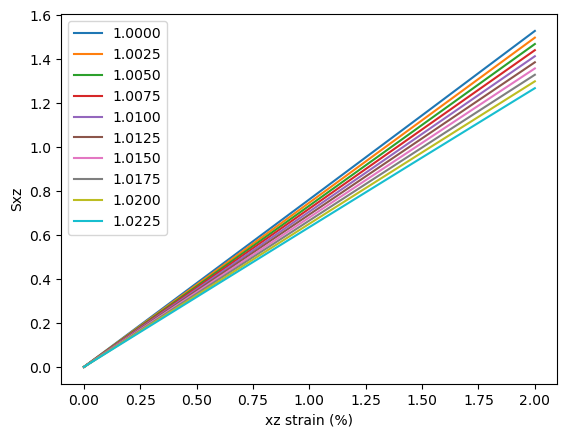

In [6]:
lat = np.linspace(1.,1.0225,10)
e = np.arange(2001)*1e-3 # strn in %

filename = '100-010-001/xz_loading/'
c44 = []
for l in lat:
    path = filename + 'Results/'+'{:.4f}'.format(l)
    log_extract_xz(path+'/log.lammps', path+'/data.txt')
    df = read_csv(filepath_or_buffer=path+'/data.txt', sep='\s+')
    plt.plot(e, -df.Pxz/10000 + df.Pxz[0]/10000 , label='{:.4f}'.format(l))
    plt.xlabel('xz strain (%)')
    plt.ylabel('Sxz')
    plt.legend()
    c44.append(C_ij(-df.Pxz/1e4, e*1e-2)) # s_xz = c44*e_xz
    

In [7]:
def log_extract_xx(fr, fw):
    with open(fr, 'r') as file:
        lines = file.readlines()
    with open(fw, 'w') as file:
          file.writelines(lines[109:2000+109+2])  
#         file.writelines(lines[105:2000+105+2])   

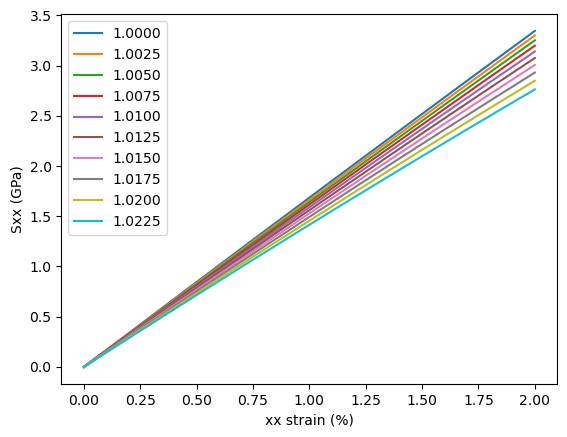

In [8]:
filename = '100-010-001/xx_loading/'
c11 = []
c12 = []
c13 = []
for l in lat:
    path = filename + 'Results/'+'{:.4f}'.format(l)
    log_extract_xx(path+'/log.lammps', path+'/data.txt')
    df = read_csv(filepath_or_buffer=path+'/data.txt', sep='\s+')
    plt.plot(e, -df.Pxx/10000 - (-df.Pxx[0]/10000) , label='{:.4f}'.format(l))
    plt.xlabel('xx strain (%)')
    plt.ylabel('Sxx (GPa)')
    plt.legend()
    c11.append(C_ij(-df.Pxx/1e4,e*1e-2)) # sxx = c11*e_xx
    c12.append(C_ij(-df.Pyy/1e4,e*1e-2)) # syy = c12*e_xx
    c13.append(C_ij(-df.Pzz/1e4,e*1e-2)) # syy = c12*e_xx
    
c11 = np.array(c11)

c12 = np.array(c12)

c13 = np.array(c13)

c44 = np.array(c44)

T = np.linspace(0,(lat[-1]-1)/alpha*3,10) #
#      np.array([  25.        ,  163.63917086,  319.44906893,  467.22022531,
#         608.28987813,  741.14100585,  865.3083506 ,  986.10646563,
#        1095.33121106, 1197.02915587]) # from MD lattice expansion data (np.linspace(0,(lat[-1]-1)/alpha*3,10) # using vol. alpha)

In [9]:
T

array([   0.        ,  178.57142857,  357.14285714,  535.71428571,
        714.28571429,  892.85714286, 1071.42857143, 1250.        ,
       1428.57142857, 1607.14285714])

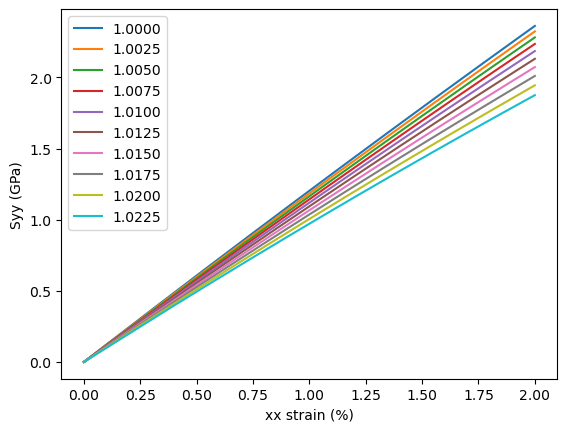

In [10]:
for l in lat:
    path = filename + 'Results/'+'{:.4f}'.format(l)
    log_extract_xx(path+'/log.lammps', path+'/data.txt')
    df = read_csv(filepath_or_buffer=path+'/data.txt', sep='\s+')
    plt.plot(e, -df.Pyy/10000 - (-df.Pyy[0]/10000) , label='{:.4f}'.format(l))
    plt.xlabel('xx strain (%)')
    plt.ylabel('Syy (GPa)')
    plt.legend()

0.9993138168221843
0.9974209263366239
0.9977648565480648


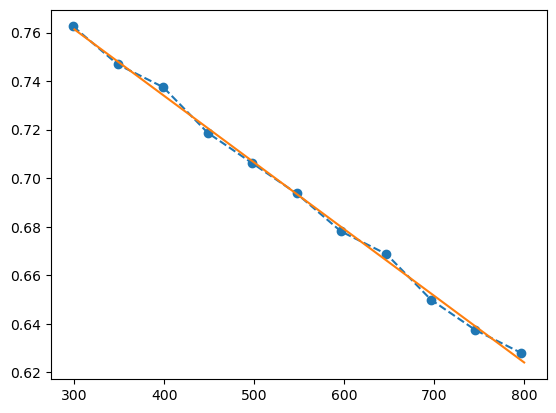

In [11]:
def get_fit(t, y, n):
    coeffs = np.polyfit(y[:,0],y[:,1],n)
    p = np.poly1d(coeffs)
    
    #########################
    yhat = p(y[:,0])                         
    ybar = np.sum(y[:,1]/len(y[:,1]))         
    ssreg = np.sum((yhat-y[:,1])**2)/(np.size(y[:,1]) - n) 
    sstot = np.sum((y[:,1] - ybar)**2)/(np.size(y[:,1])- 1)
    r2 = 1 - ssreg/sstot
    #########################
    print (r2)
    
    return p(t)
############## Data From Experiments ####################
c11e = np.loadtxt('c11.csv', delimiter=',')
Be = np.loadtxt('B.csv', delimiter=',')
c44e = np.loadtxt('c44.csv', delimiter=',')

T_f = np.linspace(300,800)
n=1 # fitting degree for C vs T data
c11_f = get_fit(T_f, c11e,n)
B_f = get_fit(T_f, Be,n)
c44_f = get_fit(T_f, c44e,n)

c12_f = B_f
c12_f = (3*B_f-c11_f)/2  # B = 1/2(c11+2c12)

plt.plot(c44e[:,0], c44e[:,1],'o--')
plt.plot(T_f, c44_f)

In [12]:
def tranform_c(T, c11,c12, c44):
    C_t = np.zeros((6,6,len(T)))
    Q = np.loadtxt('transf matrix')
    for ic in range(len(T)):
        C = np.array([[c11[ic], c12[ic], c12[ic], 0, 0, 0], [c12[ic], c11[ic], c12[ic], 0, 0 ,0], [c12[ic], c12[ic], c11[ic], 0, 0, 0], [0, 0, 0, c44[ic], 0, 0], [0, 0, 0, 0, c44[ic], 0], [0, 0, 0, 0, 0, c44[ic]]])

        C_t[:,:,ic] = np.dot(Q,np.dot(C,Q.T))
    return C_t

def transform_dc(c11,c12, c44):
    C_t = np.zeros((6,6))
    Q = np.loadtxt('transf matrix')
    
    C = np.array([[c11, c12, c12, 0, 0, 0], [c12, c11, c12, 0, 0 ,0], [c12, c12, c11, 0, 0, 0], [0, 0, 0, c44, 0, 0], [0, 0, 0, 0, c44, 0], [0, 0, 0, 0, 0, c44]])

    C_t = np.dot(Q,np.dot(C,Q.T))
    return C_t

def diff(x,y):
    return np.mean(y[1:] - y[:-1])/(x[1]-x[0]) # uniform x

CT_e = tranform_c(T_f, c11_f, c12_f, c44_f) # from exp. data
CT = tranform_c(T, c11, c12, c44)
dc11 = diff(T, c11)
dc12 = diff(T, c12)
dc44 = diff(T, c44)

dC_dT = transform_dc(dc11, dc12, dc44) # GPa/K

(50.0, 180.0)

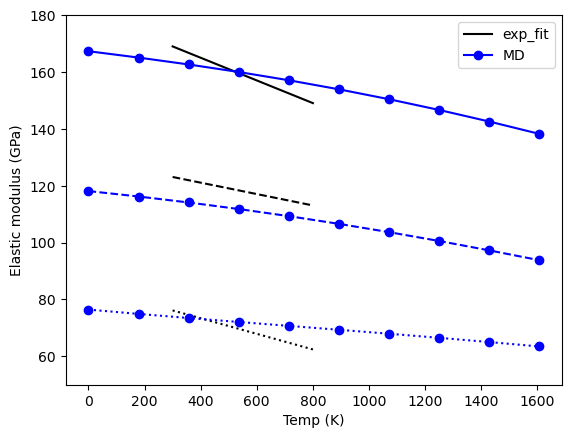

In [13]:
# plt.plot(T_f, CT[0,0,:]*1e2, 'k', label='exp_fit')
plt.plot(T_f, c11_f*1e2, 'k', label='exp_fit')
plt.plot(T, c11, 'bo-', label='MD')
plt.plot(T_f, c12_f*1e2, 'k--')
plt.plot(T, c12, 'bo--')
plt.plot(T_f, c44_f*1e2, 'k', linestyle='dotted')
plt.plot(T, c44, 'bo', linestyle='dotted')
plt.legend()
plt.ylabel('Elastic modulus (GPa)')
plt.xlabel('Temp (K)')
plt.ylim(50,180)
# plt.savefig('exp_MD_comp_DC_DT.png')

0.9999637726163771
0.9999748902071537
0.9999956603827234
293.8775510204082


293.8775510204082

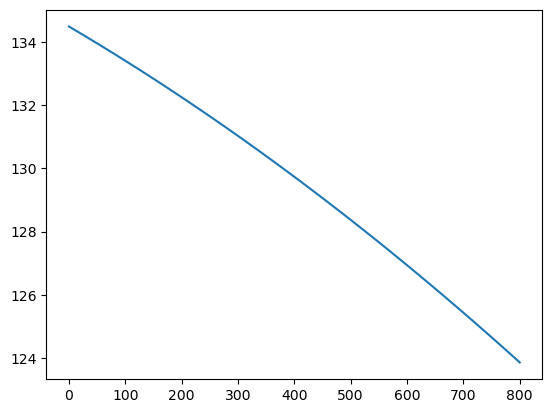

In [14]:
T_p = np.linspace(0,800)
c11_p = get_fit(T_p, np.column_stack((T,CT[0,0,:])),2)
c12_p = get_fit(T_p, np.column_stack((T,CT[0,1,:])),2)
c13_p = get_fit(T_p, np.column_stack((T,CT[0,2,:])),2)
it=  18 # for 293 K (general)
Tempr = T_p[it] # free energy temperature
K_T = (c11_p[it] + c12_p[it] + c13_p[it])/3 # Bulk mod. at 650K
plt.plot(np.linspace(0,800), (c11_p + c12_p + c13_p)/3 )
print (Tempr)
Tempr

In [15]:
# for i in range(2,35,3):
#     filename = 'strain_compute/2%_30_repl/volume_strain.'+repr(i)+'.txt'
#     with open(filename, 'r') as file:
#         lines = file.readlines()
#     with open(filename, 'w') as file:
#         file.write('exx,eyy,ezz,exy,exz,eyz,id,vol\n')
#         file.writelines(lines[1:])

In [16]:
filepath = 'strain_compute/compression/2%_30_repl/strain_volume_compute_10A_cutoff/'
rf = 3 # 4
final = 31 
df_0 = read_csv(filepath_or_buffer=filepath + 'volume_strain.'+repr(rf)+'.txt', sep=',',index_col='id')

vol_avg = 11.68
# df_0.vol[df_0.vol>13] = vol_avg # avg. Cu vol. per atom
df_0 = df_0[df_0.vol<13]
s = []
r = []
del_V = []
del_V_e_50 = []
s_1_eps = []
s_1_vor = []
s_2 = []
VOL_THRESH = 13 # to ignore surface effects in voronoi vol.
for i in range(1,final,1):
    E_V = np.zeros((6,6))
    filename = filepath + 'volume_strain.'+repr(i)+'.txt'
    data = read_csv(filepath_or_buffer=filename, sep=',', index_col='id')
#     data.vol[data.vol>13] = vol_avg
    df = data[data.vol<13] 

    df['shear_strain'] = np.sqrt(df.exy**2 + df.exz**2 + df.eyz**2 + 1./6*((df.exx-df.eyy)**2 + (df.exx - df.ezz)**2 + (df.eyy - df.ezz)**2))

    #df.drop(labels=df[(df.shear_strain>0.01) & ((df.x<-31) | (df.x>35) | (df.z<412))].index, axis=0, inplace=True)

    E_V[0,0] = (df.exx*df.exx*df_0.vol).sum()
    E_V[0,1] = (df.eyy*df.exx*df_0.vol).sum()
    E_V[0,2] = (df.ezz*df.exx*df_0.vol).sum()
    E_V[0,3] = (df.eyz*df.exx*df_0.vol).sum()
    E_V[0,4] = (df.exz*df.exx*df_0.vol).sum()
    E_V[0,5] = (df.exy*df.exx*df_0.vol).sum()

    E_V[1,0] = (df.exx*df.eyy*df_0.vol).sum()
    E_V[1,1] = (df.eyy*df.eyy*df_0.vol).sum()
    E_V[1,2] = (df.ezz*df.eyy*df_0.vol).sum()
    E_V[1,3] = (df.eyz*df.eyy*df_0.vol).sum()
    E_V[1,4] = (df.exz*df.eyy*df_0.vol).sum()
    E_V[1,5] = (df.exy*df.eyy*df_0.vol).sum()

    E_V[2,0] = (df.exx*df.ezz*df_0.vol).sum()
    E_V[2,1] = (df.eyy*df.ezz*df_0.vol).sum()
    E_V[2,2] = (df.ezz*df.ezz*df_0.vol).sum()
    E_V[2,3] = (df.eyz*df.ezz*df_0.vol).sum()
    E_V[2,4] = (df.exz*df.ezz*df_0.vol).sum()
    E_V[2,5] = (df.exy*df.ezz*df_0.vol).sum()

    E_V[3,0] = (df.exx*df.eyz*df_0.vol).sum()
    E_V[3,1] = (df.eyy*df.eyz*df_0.vol).sum()
    E_V[3,2] = (df.ezz*df.eyz*df_0.vol).sum()
    E_V[3,3] = (df.eyz*df.eyz*df_0.vol).sum()
    E_V[3,4] = (df.exz*df.eyz*df_0.vol).sum()
    E_V[3,5] = (df.exy*df.eyz*df_0.vol).sum()

    E_V[4,0] = (df.exx*df.exz*df_0.vol).sum()
    E_V[4,1] = (df.eyy*df.exz*df_0.vol).sum()
    E_V[4,2] = (df.ezz*df.exz*df_0.vol).sum()
    E_V[4,3] = (df.eyz*df.exz*df_0.vol).sum()
    E_V[4,4] = (df.exz*df.exz*df_0.vol).sum()
    E_V[4,5] = (df.exy*df.exz*df_0.vol).sum()

    E_V[5,0] = (df.exx*df.exy*df_0.vol).sum()
    E_V[5,1] = (df.eyy*df.exy*df_0.vol).sum()
    E_V[5,2] = (df.ezz*df.exy*df_0.vol).sum()
    E_V[5,3] = (df.eyz*df.exy*df_0.vol).sum()
    E_V[5,4] = (df.exz*df.exy*df_0.vol).sum()
    E_V[5,5] = (df.exy*df.exy*df_0.vol).sum()

    
#     del_V.append((df.vol - df_0.vol).sum()) # voronoi
#     del_V_e_50.append(((df.exx + df.eyy + df.ezz)*df.vol).sum()) # Green-Lagr. Strain 
    
    V_V_vor = K_T*(df.vol - df_0.vol).sum()

    V_V_eps = K_T*((df.exx + df.eyy + df.ezz)*df.vol).sum() # (c11 + c12 + c13 = K_T GPa @ T=650K)

    s.append(alpha*V_V_eps/160.2 - 0.5*(dC_dT*E_V).sum()/160.2) # in eV/K  -0.5*(dC_dT*E_V).sum()/160.2176620 +
    s_1_eps.append(alpha*V_V_eps/160.2)
    s_1_vor.append(alpha*V_V_vor/160.2)
    s_2.append(- 0.5*(dC_dT*E_V).sum()/160.2)
    r.append(alpha*V_V_eps/(-0.5*(dC_dT*E_V).sum())) # ratio of vol strn to 2nd order full strn
    


# np.savetxt(filepath + 'S_cut_off_10.txt', s, delimiter= ' ')
# np.savetxt('strain_compute/2%_30_repl/ratio_cut_off_50_'+repr(Tempr)+'.txt', r, delimiter= ' ')

/var/folders/11/20rr6pys3gq_ndbcqw57ny2r448330/T/ipykernel_98506/3464857225.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shear_strain'] = np.sqrt(df.exy**2 + df.exz**2 + df.eyz**2 + 1./6*((df.exx-df.eyy)**2 + (df.exx - df.ezz)**2 + (df.eyy - df.ezz)**2))
/var/folders/11/20rr6pys3gq_ndbcqw57ny2r448330/T/ipykernel_98506/3464857225.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shear_strain'] = np.sqrt(df.exy**2 + df.exz**2 + df.eyz**2 + 1./6*((df.exx-df.eyy)**2 + (df.exx - df.ezz)**2 + (

array([-1.93556821e+01, -4.17336861e+01, -5.58342100e+13,  4.06246423e+01,
        1.54325238e+01,  1.20946073e+01,  1.10510742e+01,  1.04314201e+01,
        9.88625883e+00,  9.59066174e+00,  9.44291249e+00,  9.37978927e+00,
        9.31710503e+00,  9.28722558e+00,  9.23835722e+00,  9.17759592e+00,
        9.11887243e+00,  9.03602033e+00,  8.91524411e+00,  8.84662837e+00,
        8.78614469e+00,  8.59670477e+00,  8.35550501e+00,  8.12585415e+00,
        7.95678020e+00,  7.85640883e+00,  7.84421263e+00,  7.93944169e+00,
        8.04611492e+00,  8.10056420e+00])

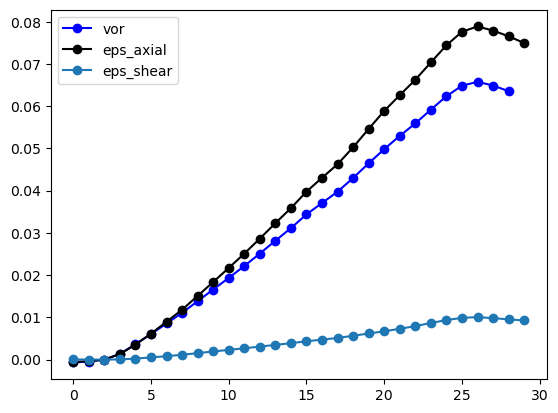

In [17]:
plt.plot(s_1_vor[:-1], 'bo-', label='vor')
plt.plot(s_1_eps, 'ko-', label='eps_axial')
plt.plot(s_2, 'o-', label='eps_shear' )
plt.legend()
plt.savefig(filepath+'s_contribution.png')
np.asarray(s_1_vor) - np.asarray(s_1_eps)
np.asarray(s_1_eps)/np.asarray(s_2)

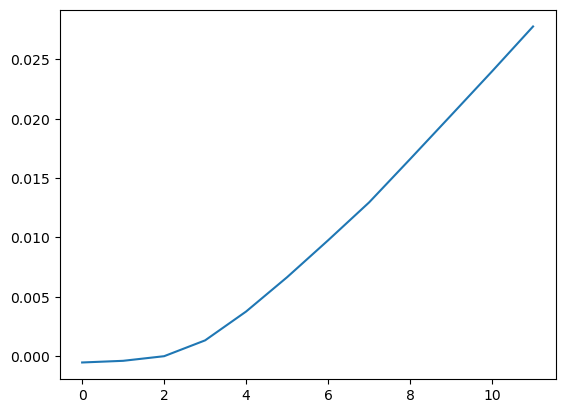

In [18]:
# s_30 = np.loadtxt(filepath + 'S_cut_off_5.txt')
# s_eps = s
# s_vor = s
# plt.plot(s_eps, 'o-')
# plt.plot(s_vor, 'o-')
plt.plot(s[:12])

# For a Finer NEB run 

0.9998136521509325
0.9987563090767758
VARIATIONAL PE BARRIER:  3.4878258730567433
VARIATIONAL ENTROPY EXP.:  34.859034040616976 FREE ENERGY BARRIER:  0.8078702359286907
For temperature : 650K VARIATIONAL ENTROPIC PREFAC.:  34.859034040616976 FREE ENERGY BARRIER:  0.8078702359286907
For temperature : 300K VARIATIONAL ENTROPIC PREFAC.:  53.21537685046819 FREE ENERGY BARRIER:  2.7332968288088617
For temperature : 100K VARIATIONAL ENTROPIC PREFAC.:  98.30563056243763 FREE ENERGY BARRIER:  4.912288678953925


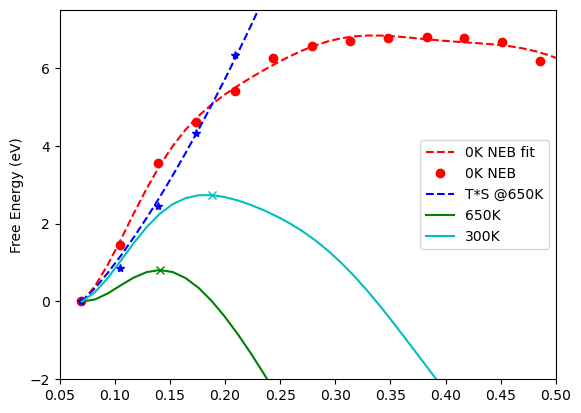

In [19]:
s_30 = np.asarray(s) #np.loadtxt(filepath + 'S_cut_off_5.txt')
pe = np.loadtxt(filepath + 'pe_neb.txt')
rc = pe[:,0]
pe_30 = pe[:,1]
rn = len(s_30)
def free_eng(u,s,T):
    return u - T*s
T1 = 650
T2 = 300
T3 = 100
r = np.linspace(0.07,1.,80) # np.linspace(0,.4,80)
s_fit = get_fit(r, np.column_stack((rc[:rn], s_30[:])),8)
pe_fit = get_fit(r, np.column_stack((rc[:rn], pe_30[:rn])),16)
#############################################################
np.savetxt(filepath+'entropy_fit.txt',s_fit)
np.savetxt(filepath+'reac_coord_fit.txt',r-r[0])
np.savetxt(filepath+'pe_fit.txt',pe_fit)
np.savetxt(filepath+'s_neb.txt', s)
#############################################################
plt.plot(r,pe_fit, 'r--', label='0K NEB fit')
plt.plot(rc[:rn],pe_30[:rn], 'ro', label='0K NEB')
plt.plot(rc[:rn],s_30*T1, 'b*') #, label='0K NEB')
plt.plot(r, T1*s_fit, 'b--', label='T*S @'+ repr(T1)+'K')
plt.plot(r, pe_fit-T1*s_fit, 'g-', label=repr(T1)+'K')
plt.plot(r, pe_fit-T2*s_fit, 'c-', label=repr(T2)+'K')
plt.legend()
plt.ylabel('Free Energy (eV)')
plt.ylim(-2,7.5)
plt.xlim(.05,.5)

# plt.ylim(-5,7)
SLICE = 4
plt.plot(r[SLICE+np.argmax((pe_fit-T1*s_fit)[SLICE:])], max((pe_fit-T1*s_fit)[SLICE:]), 'gx')
plt.plot(r[SLICE+np.argmax((pe_fit-T2*s_fit)[SLICE:])], max((pe_fit-T2*s_fit)[SLICE:]), 'cx')
# plt.plot(r[4+np.argmax((pe_fit-T1*s_fit)[4:])]*np.ones(30), np.linspace(-5,7,30), 'y--')
print ('VARIATIONAL PE BARRIER: ', pe_fit[SLICE+np.argmax((pe_fit-T1*s_fit)[SLICE:])])
plt.savefig(filepath+'Free_energy_cutoff_10A.png')
Nuc_sites = 120
print ('VARIATIONAL ENTROPY EXP.: ', np.log10(np.exp(s_fit[SLICE+np.argmax((pe_fit-T1*s_fit)[SLICE:])]/8.617e-5)*1e12*Nuc_sites), 'FREE ENERGY BARRIER: ', max((pe_fit-T1*s_fit)))
print (f'For temperature : {T1}K VARIATIONAL ENTROPIC PREFAC.: ', np.log10(np.exp(s_fit[SLICE+np.argmax((pe_fit-T1*s_fit)[SLICE:])]/8.617e-5)*1e12*Nuc_sites), 'FREE ENERGY BARRIER: ', max((pe_fit-T1*s_fit)))
print (f'For temperature : {T2}K VARIATIONAL ENTROPIC PREFAC.: ', np.log10(np.exp(s_fit[SLICE+np.argmax((pe_fit-T2*s_fit)[SLICE:])]/8.617e-5)*1e12*Nuc_sites), 'FREE ENERGY BARRIER: ', max((pe_fit-T2*s_fit)))
print (f'For temperature : {T3}K VARIATIONAL ENTROPIC PREFAC.: ', np.log10(np.exp(s_fit[SLICE+np.argmax((pe_fit-T3*s_fit)[SLICE:])]/8.617e-5)*1e12*Nuc_sites), 'FREE ENERGY BARRIER: ', max((pe_fit-T3*s_fit)))

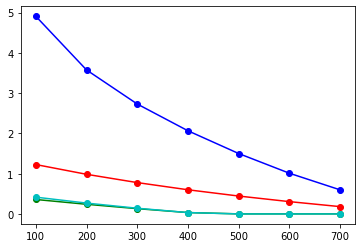

In [20]:
eps = -2.
def free_eng(pe,s,T):
    return max(pe - T*s)

T = np.linspace(100,700,7)
F = lambda T: free_eng(pe_fit, s_fit, T)

# F = free_eng(pe_fit, s_fit, T)
F_T = np.array([F(t) for t in T])
F_T[F_T < 0.] = 0.
np.savetxt(filepath+'max_free_eng_temp_'+str(eps)+'.txt', np.column_stack((T, F_T)))

F5_T = np.asarray(np.loadtxt('strain_compute/compression/5%_11_repl/strain_volume_compute_10A/max_free_eng_temp_-5.0.txt'))
F4_T = np.asarray(np.loadtxt('strain_compute/compression/4%_11_repl/strain_volume_compute_10A/max_free_eng_temp_-4.0.txt'))
F3_T = np.asarray(np.loadtxt('strain_compute/compression/3%_30_repl/strain_volume_compute_10A/max_free_eng_temp_-3.0.txt'))
plt.plot(T, F_T, 'bo-')
plt.plot(F5_T[:,0], F5_T[:,1], 'go-')
plt.plot(F4_T[:,0], F4_T[:,1], 'co-')
plt.plot(F3_T[:,0], F3_T[:,1], 'ro-')

In [ ]:
plt.plot(r,s_fit)
plt.plot(rc, s,'o')
plt.xlim(0.05,.7)

In [ ]:

f = lambda T: free_eng(pe_30[:rn], s_30, T)
T1 = 650
T2 = 500
plt.plot(rc[:rn],f(T1), 'b*-', label=repr(T1)+'K')
# plt.plot(r, T1*s_fit, 'b*-', label=repr(T1)+'K')
plt.plot(rc[:rn],f(T2), 'bo--', label=repr(T2)+'K')
plt.plot(rc[:rn],pe_30[:rn], 'ro-', label='0K NEB')

plt.xlabel('reaction cord.')
plt.ylabel('Free energy (eV)')
plt.legend()
# plt.savefig(filepath + 'Free Energy at temperatures_eps-cutoff_5.png')
# plt.ylim(-.1,.18)
# plt.xlim(.15,.3)
# np.savetxt(filepath + 'preactor.txt', np.log10(1/np.exp(-pe_30[f(375).argmax()]/8.6e-5/375)/8.25e-9))
max(f(T1)) - f(T1)[1]
f(T1)
# pe[3]
# plt.ylim(0,4)
# plt.xlim(0.05,0.15)

In [ ]:
r = np.linspace(0,.2,50)
f_fit = get_fit(r, np.column_stack((rc[:rn], f(T1))),8)
plt.plot(rc[:rn],f(T1), 'b*-', label=repr(T1)+'K')
plt.plot(r,f_fit, 'k-', label=repr(T1)+'K')

In [ ]:
pe_30[:rn]

In [ ]:
plt.plot(rc[:rn],pe_30[:rn], 'ro-', label='0K NEB')
plt.plot(rc[2:rn],pe_30[2:rn]-300*s_30_300[2:], 'b*--', label='300K')
plt.plot(rc[2:rn],pe_30[2:rn]-600*s_30[2:], 'b^--', label='600K')
plt.plot(rc[2:rn],pe_30[2:rn]-700*s_30_700[2:], 'bo-', label='700K')

plt.xlabel('reaction cord.')
plt.ylabel('Free energy (eV)')
plt.legend()
# plt.savefig('Free Energy at temperatures.png')

In [ ]:
plt.plot(s_30, 'bo-')

In [ ]:
plt.plot(rc[:10],pe_30[:10], 'ro-')
# plt.savefig('pe_30_neb.png')
plt.plot(rc[:6], s_30*375, 'bo-')

In [ ]:
 np.exp(3.62615000e-03/8.6e-5)

In [ ]:
3.62615000e-03/8.6e-5

In [ ]:
np.log10(1/np.exp(-3.29/8.6e-5/625)/5e-9)

In [ ]:
plt.plot(df.ezz, 'o')

In [ ]:
plt.hist(df.vol-df_0.vol,bins=2000)
plt.ylim(0,200)

# Per-atom entropy computation

In [21]:
def compute_per_atom_entropy(alpha, K_T, df, dC_dT):
    
    import pandas as pd
    
    pd.set_option('mode.chained_assignment', None)
    
    strain_label = ['exx', 'eyy', 'ezz', 'exy', 'exz', 'eyz']

    s1_per_atom = alpha*K_T*(df.exx + df.eyy + df.ezz)*df.vol
    s2_per_atom = np.zeros(len(df.exx))

    for i in range(6):
        for j in range(6):
             s2_per_atom += -0.5*dC_dT[i,j]*df[strain_label[i]]*df[strain_label[j]]*df.vol
    
    df.loc[:,'s_per_atom'] = (s1_per_atom + s2_per_atom)/160.2
    
    return df


def write_xyz(lattice, origin, df, outname):
        
    with open(outname, 'w') as file:
        N = len(df.exx)
        file.write(f'{N}\n')
        file.write(f'Lattice="{lattice}" Origin="{origin}" Properties=pos:R:3:entropy:R:1:vol:R:1\n')
        data = np.zeros((N, 5))
        data[:,0] = df.x
        data[:,1] = df.y
        data[:,2] = df.z
        data[:,3] = df.s_per_atom
        data[:,4] = df.vol
        np.savetxt(file, data, delimiter=' ')
    return
        
    

# Compression 2%

In [25]:
lattice = '168.2669886748 0.0 0.0 0.0 177.0981084 0.0 0.0 0.0 500.0'
origin = '-62.6239784133 -84.12160149 200.0'


start = 1
final = 31
step =1

for i in range(start, final, step):
    filename = filepath + 'volume_strain.'+repr(i)+'.txt'
    df = read_csv(filepath_or_buffer=filename, sep=',', index_col='id')
    df_s = compute_per_atom_entropy(alpha, K_T, df, dC_dT)
    write_xyz(lattice, origin, df_s, filepath+f'per_atom_entropy_{i}.xyz')



# Tension 2%

In [26]:
filepath = 'strain_compute/tension/2%_30_replica/strain_volume_compute_10A/'

In [27]:
lattice = '168.2669886748 0.0 0.0 0.0 177.0981084 0.0 0.0 0.0 500.0'
origin = '-62.6239784133 -84.12160149 200.0'


start = 1
final = 12
step =1

for i in range(start, final, step):
    filename = filepath + 'volume_strain.'+repr(i)+'.txt'
    df = read_csv(filepath_or_buffer=filename, sep=',', index_col='id')
    df_s = compute_per_atom_entropy(alpha, K_T, df, dC_dT)
    write_xyz(lattice, origin, df_s, filepath+f'per_atom_entropy_{i}.xyz')

# Comparision of Entropy evolution across strain levels

In [ ]:
strain_comp = [2,3,4,5]
for istrain, strain in enumerate(strain_comp):
    file = 'strain_compute/compression/2'